In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [2]:
X = np.array([1, 2, 4, 5, 8])

In [3]:
y = np.array([3, 5, 6, 8, 9])

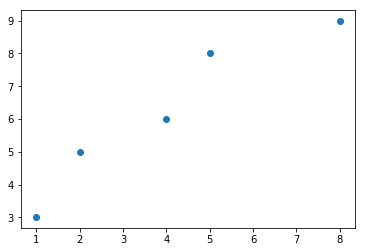

In [4]:
plt.scatter(X, y)

In [5]:
trend = LinearRegression()

In [6]:
X

array([1, 2, 4, 5, 8])

In [7]:
X = X.reshape(-1, 1)

In [8]:
trend.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
X_pred = np.linspace(X.min(), X.max(), num=10).reshape(-1, 1)
y_pred = trend.predict(X_pred)

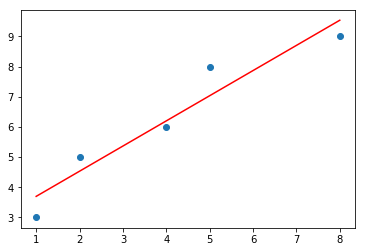

In [10]:
plt.scatter(X, y)
plt.plot(X_pred, y_pred, c='red');

In [11]:
trend.coef_

array([0.83333333])

In [12]:
trend.intercept_

2.866666666666666

In [13]:
trend.predict([[0]])

array([2.86666667])

In [14]:
def trace(filename, return_pixels=False, return_image=False, **kwargs):
    image = Image.open(filename).convert('L')
    pixels = np.array(image)
    dots = np.nonzero(pixels < 128)
    y, X = dots
    X = X.reshape(-1, 1)
    
    regressor = KNeighborsRegressor(**kwargs)
    regressor.fit(X, y)
    X_pred = np.arange(image.width).reshape(-1, 1)
    y_pred = regressor.predict(X_pred)
    
    if return_pixels:
        return X_pred, y_pred, pixels
    if return_image:
        return X_pred, y_pred, image
    return X_pred, y_pred

In [15]:
def trace_plot(filename, **kwargs):
    X, y, pixels = trace(filename, return_pixels=True, **kwargs)
    plt.figure(figsize=(10, 7))
    plt.imshow(pixels)
    plt.plot(X, y, c='r')
    plt.show()

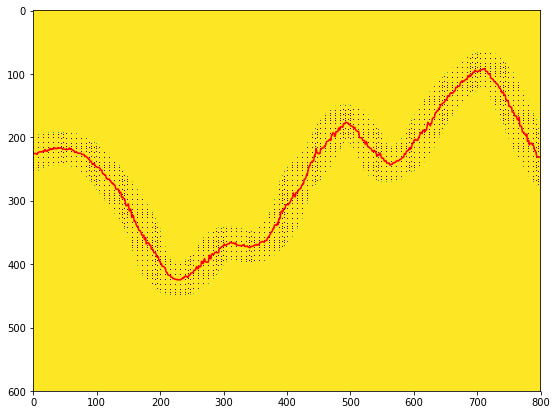

In [16]:
trace_plot('input.png', n_neighbors=30)

In [17]:
def trace_image(filename, **kwargs):
    X, y, image = trace(filename, return_image=True, **kwargs)
    image = image.convert('RGB')
    draw = ImageDraw.Draw(image)
    x_coords = X.ravel()
    y_coords = y.round().astype(int)
    draw.line(list(zip(x_coords, y_coords)), fill=(15, 10, 0))
    return image

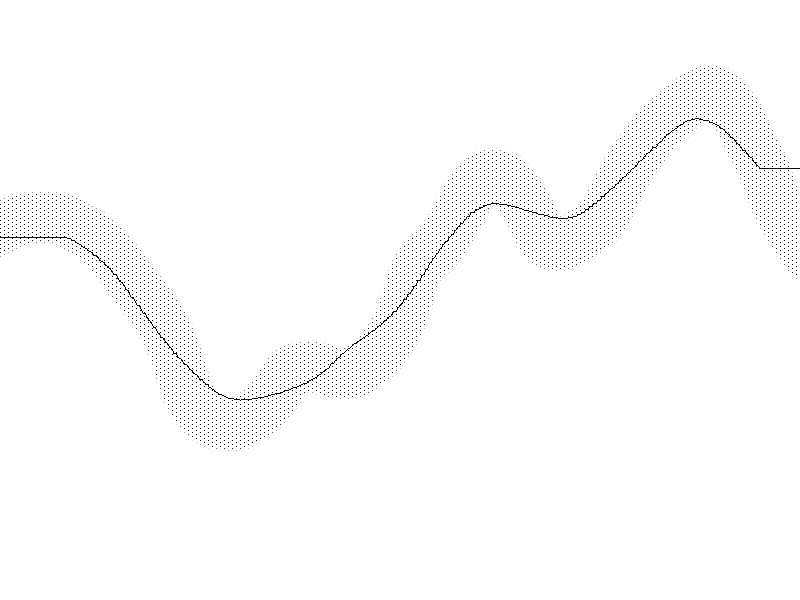

In [18]:
trace_image('input.png', n_neighbors=510)